In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [7]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [8]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [115]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            errors.append(err)
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return errors

In [116]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            inds = np.random.randint(n, size=batch_size)

            X_tmp = X[inds, ]
            y_tmp = np.array(y)[inds]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            errors.append(err)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return errors

In [117]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
y = x_data = np.random.uniform(-10, 10, 1000)

In [118]:
X_st = X.copy().astype(np.float64)
X_st[:, 0] = standard_scale(X_st[:, 0])
X_st[:, 1] = standard_scale(X_st[:, 1])
errors__5 = []

In [123]:
errors_1 = gradient_descent(X_st, Y, iterations=400, eta=1e-2)

Iter: 0, weights: [-0.1157984  -1.04516056], error 8677.995585020386
Iter: 40, weights: [33.39319834 36.49424508], error 1823.3778772235435
Iter: 80, weights: [48.66098123 53.52329546], error 407.29677357312556
Iter: 120, weights: [55.61681672 61.24879557], error 114.74612779820416
Iter: 160, weights: [58.78553168 64.75384992], error 54.30654853941845
Iter: 200, weights: [60.22890702 66.34420381], error 41.819819716873184
Iter: 240, weights: [60.88632145 67.06584708], error 39.240042011799
Iter: 280, weights: [61.18573025 67.39332355], error 38.70704869012286
Iter: 320, weights: [61.32208075 67.54193948], error 38.59692856838227
Iter: 360, weights: [61.3841701  67.60938876], error 38.57417672335576
Final MSE: 38.56947592954995


In [133]:
errors_2 = stohastic_gradient_descent(X_st, Y, iterations=400, batch_size=2, eta=1e-2)

amount of batches is 500
Iter: 0, weights: [61.09408555 67.25406763], error 38.847643483788
Iter: 40, weights: [61.07052442 67.83749659], error 38.7345147069513
Iter: 80, weights: [61.37159456 66.88635007], error 39.176978195876615
Iter: 120, weights: [61.00854661 67.70839399], error 38.753759993881154
Iter: 160, weights: [60.45319074 67.52257677], error 39.54793281775227
Iter: 200, weights: [61.56756228 67.71831624], error 38.58800073514403
Iter: 240, weights: [61.32414951 67.76625342], error 38.59148461330768
Iter: 280, weights: [61.03016392 67.57203697], error 38.73990612205166
Iter: 320, weights: [61.58044775 68.18815926], error 38.85867533727823
Iter: 360, weights: [62.11583229 67.00031375], error 39.49457877613946
Final MSE: 38.937947261960424


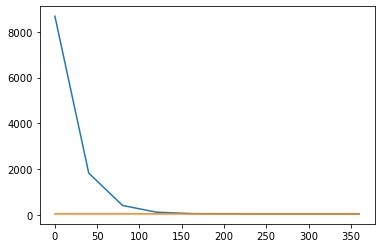

In [132]:
x = np.arange(0, 400, 40)
plt.plot(x,errors_1,x,errors_2)

Как мы видим на графике в данном случае (с 2 весами) стахостический метод почти сразу попал правильно, но его выполнение заняло сильно больше времени чем стандартный. Поэтому в такой задаче лучше использовать классический градиентный спуск